[*********************100%***********************]  5 of 5 completed


Enter your target annual return as a percentage (e.g., 10 for 10%):  20



Optimal Portfolio Allocation:
AAPL: 31.15%
AMZN: 25.21%
GOOGL: 21.04%
MSFT: 16.29%
TSLA: 6.30%

Expected Portfolio Return: 20.00%
Portfolio Volatility (Risk): 33.32%
Sharpe Ratio: 0.57


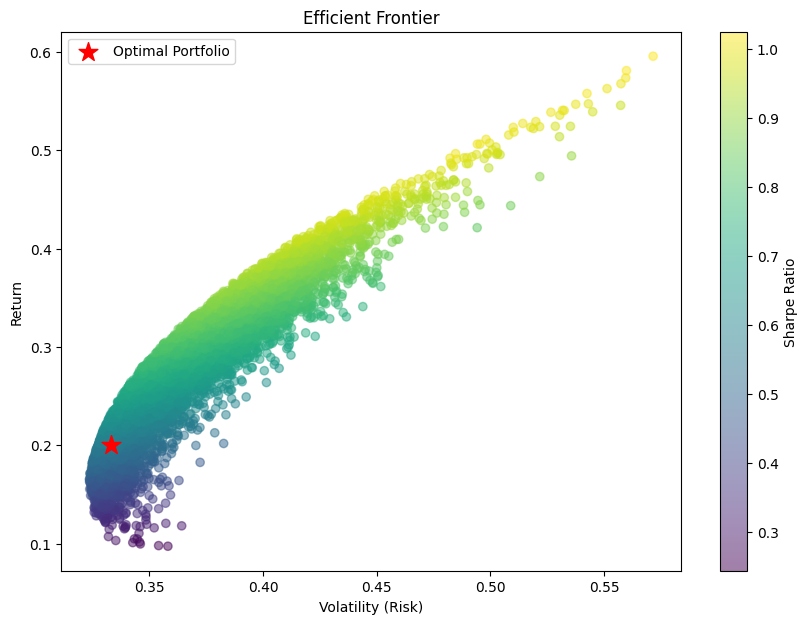

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

class StockData:
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date

    def fetch_data(self):
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date)['Adj Close']
        returns = data.pct_change().dropna()
        return returns

    def calculate_statistics(self, returns):
        mean_returns = returns.mean() * 252  # Annualized mean returns
        cov_matrix = returns.cov() * 252  # Annualized covariance matrix
        return mean_returns, cov_matrix

class PortfolioOptimization:
    def __init__(self, mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.01):
        self.mean_returns = mean_returns
        self.cov_matrix = cov_matrix
        self.num_portfolios = num_portfolios
        self.risk_free_rate = risk_free_rate

    def generate_random_portfolios(self):
        results = np.zeros((3, self.num_portfolios))
        weights_record = []

        num_assets = len(self.mean_returns)
        for i in range(self.num_portfolios):
            weights = np.random.random(num_assets)
            weights /= np.sum(weights)  # Normalize to make sum of weights = 1
            weights_record.append(weights)

            portfolio_return = np.dot(weights, self.mean_returns)
            portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(self.cov_matrix, weights)))
            results[0, i] = portfolio_stddev  # Volatility (Risk)
            results[1, i] = portfolio_return  # Return
            results[2, i] = (portfolio_return - self.risk_free_rate) / portfolio_stddev  # Sharpe Ratio

        return results, weights_record

    def get_optimal_portfolio(self, target_return=None, target_risk=None):
        """
        Given a target return or risk, find the optimal portfolio close to the desired target.
        """
        results, weights_record = self.generate_random_portfolios()
        portfolios = pd.DataFrame(results.T, columns=['Risk', 'Return', 'Sharpe'])

        if target_return is not None:
            # Find the portfolio closest to the target return
            portfolios['Difference'] = abs(portfolios['Return'] - target_return)
            optimal_portfolio = portfolios.loc[portfolios['Difference'].idxmin()]
        elif target_risk is not None:
            # Find the portfolio closest to the target risk (volatility)
            portfolios['Difference'] = abs(portfolios['Risk'] - target_risk)
            optimal_portfolio = portfolios.loc[portfolios['Difference'].idxmin()]
        else:
            raise ValueError("Either target_return or target_risk must be provided.")

        optimal_weights = weights_record[portfolios.index.get_loc(optimal_portfolio.name)]
        return optimal_portfolio, optimal_weights, results

    def plot_efficient_frontier(self, results, optimal_portfolio):
        plt.figure(figsize=(10, 7))
        plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', alpha=0.5)
        plt.colorbar(label='Sharpe Ratio')
        plt.xlabel('Volatility (Risk)')
        plt.ylabel('Return')
        plt.title('Efficient Frontier')

        # Plot the optimal portfolio
        plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], color='red', marker='*', s=200, label="Optimal Portfolio")
        plt.legend()

        plt.show()

# Example usage
tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'

stock_data = StockData(tickers, start_date, end_date)
returns = stock_data.fetch_data()
mean_returns, cov_matrix = stock_data.calculate_statistics(returns)

portfolio_optimization = PortfolioOptimization(mean_returns, cov_matrix)

# Ask user for preferences
target_return = float(input("Enter your target annual return as a percentage (e.g., 10 for 10%): ")) / 100
target_risk = None  # You can choose to give priority to risk instead of return

# Get optimal portfolio
optimal_portfolio, optimal_weights, results = portfolio_optimization.get_optimal_portfolio(target_return=target_return)

# Show results
print("\nOptimal Portfolio Allocation:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight*100:.2f}%")

print(f"\nExpected Portfolio Return: {optimal_portfolio['Return']*100:.2f}%")
print(f"Portfolio Volatility (Risk): {optimal_portfolio['Risk']*100:.2f}%")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe']:.2f}")

# Ensure the target return is achievable
min_return = min(results[1, :])
max_return = max(results[1, :])

if target_return < min_return or target_return > max_return:
    print(f"Warning: The target return of {target_return*100}% is outside the achievable range ({min_return*100}% to {max_return*100}%).")
else:
    # Plot the efficient frontier with optimal portfolio
    portfolio_optimization.plot_efficient_frontier(results, optimal_portfolio)




```
    1. Describe the code, the purpose of each class, and the purpose of each method within each class.
    2. Print the file obtained from the API.
    3. What is the use cases of this application?
```



Exercise 1

**Class StockData**
- the class retrieves historical stock data based on stock tickers, and a period indicated by starting and ending period
- the Class is initialized through a list of tickerts and period the user needs
- method fetch_data:
First, it extracts adjusted close proces from yfinance library for the tickers and date rang
Then, it calculates the daily returns (percentage change) and drops the empty rows
Finally, it returns the returns of the stocks
- method calculate_statistics:
First, it uses the extracted data to calculate the mean, covariance return and multiplies by 252 (the days without weeks and weekends) 
Second, it returns the data

**Class PortfolioOptimization**
- the class finds an optimal portfolio of stocks by analyzing their returns and risks and showcases them on the efficient frontier
- the Class is initialized using the calculated mean returns, an amount of portfolios (by default 1000) and a risk free rate (by default 10%)
- method generate_random_portfolios:
First, create a matrix to store Risk/Return/Sharpe ratio for all portfolios
Second, initializes an empty list to store the weights (allocation proportions) of assets in each portfolio
Third, determines the number of assets in the portfolio based on the length of the mean_returns array
Fourth, loops through the specified number of portfolios, generates random weights to store them for later retrieval
Fifth, uses the weights to calculate the portfolio's expected return and standard deviation
Sixth, stores the Risk/Return/Sharpe ratio in the matrix
- method: get_optimal_portfolio
The method finds the optimal portfolio based on the user's preferences for either a target return or a target risk (volatility).
First, uses the generate_random_portfolios method and then finds the portfolio closest to the target return by find the portfolio closest to the target return and closest to the target risk (volatility).
Second, retrieves the asset weights for the optimal portfolio and returns it as the optimal portfolio.

- method: plot_efficient_frontier
First, plots the efficient frontier with risk vs. return, highlights the optimal portfolio, and shows Sharpe ratios.
Second, plot the optimal portfolio



Exercise 2

In [18]:
print(returns)

Ticker                         AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                                       
2020-01-03 00:00:00+00:00 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06 00:00:00+00:00  0.007968  0.014886  0.026654  0.002585  0.019255
2020-01-07 00:00:00+00:00 -0.004703  0.002092 -0.001931 -0.009117  0.038801
2020-01-08 00:00:00+00:00  0.016086 -0.007809  0.007118  0.015928  0.049205
2020-01-09 00:00:00+00:00  0.021241  0.004799  0.010498  0.012493 -0.021945
...                             ...       ...       ...       ...       ...
2022-12-23 00:00:00+00:00 -0.002798  0.017425  0.016750  0.002267 -0.017551
2022-12-27 00:00:00+00:00 -0.013878 -0.025924 -0.020621 -0.007414 -0.114089
2022-12-28 00:00:00+00:00 -0.030685 -0.014692 -0.015677 -0.010255  0.033089
2022-12-29 00:00:00+00:00  0.028324  0.028844  0.028249  0.027630  0.080827
2022-12-30 00:00:00+00:00  0.002469 -0.002138 -0.002487 -0.004937  0.011164

[755 rows x

Exercise 3

For a given return by the user, it generates an optimal portfolio by asking the user for a target return.
The program returns the weights of the optimal portfolio for the given tickers and dates within a list.
Finally, the program creates a plot with an efficient frontier and the optimal portfolio.